In [2]:
import pandas as pd

In [26]:
gov_corr = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\Mini_project_3\Analysis_SA\Queries\gov_corruption_vs_happiness.csv")

gov_corr

,country_name,avg_government_corruption,avg_happiness_score
0,Denmark,0.429,7.546
1,Norway,0.344,7.541
2,Finland,0.398,7.538
3,Switzerland,0.380,7.511
4,Canada,0.306,7.351
5,Sweden,0.398,7.319
6,New Zealand,0.400,7.313
7,Australia,0.315,7.276
8,Luxembourg,0.337,6.936
9,Oman,0.325,6.853


Query to discover the corruption vs happiness:

SELECT
	c.country_name,
    ROUND(AVG(f.government_corruption), 3) AS avg_government_corruption,
    ROUND(AVG(f.happiness_score), 3) AS avg_happiness_score
FROM factors AS f
JOIN country AS c ON f.country_id = c.country_id
GROUP BY c.country_name
HAVING avg_government_corruption > 0.3 AND avg_happiness_score > 6
ORDER BY avg_happiness_score DESC;

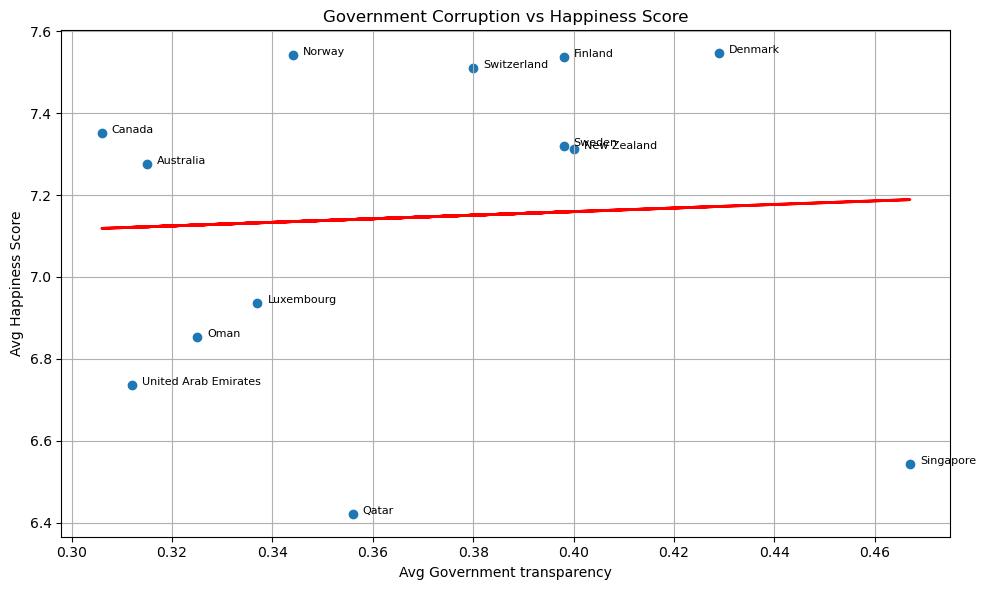

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))
plt.scatter(gov_corr['avg_government_corruption'], gov_corr['avg_happiness_score'])

# Adicionar nomes dos países como rótulos
for i, row in gov_corr.iterrows():
    plt.text(row['avg_government_corruption'] + 0.002, row['avg_happiness_score'], row['country_name'], fontsize=8)

x = gov_corr['avg_government_corruption']
y = gov_corr['avg_happiness_score']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, color='red', linewidth=2, label='Trend line')

plt.title("Government Corruption vs Happiness Score")
plt.xlabel("Avg Government transparency")
plt.ylabel("Avg Happiness Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
top_5_df = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\Mini_project_3\Analysis_SA\Queries\top_5_happy_countries_year.csv")

top_5_df

,country_name,year,happiness_score,life_expectancy
0,Switzerland,2015,7.587,0.941430
1,Iceland,2015,7.561,0.947840
2,Denmark,2015,7.527,0.874640
3,Norway,2015,7.522,0.885210
4,Canada,2015,7.427,0.905630
5,Denmark,2016,7.526,0.795040
6,Switzerland,2016,7.509,0.863030
7,Iceland,2016,7.501,0.867330
8,Norway,2016,7.498,0.795790
9,Finland,2016,7.413,0.810910


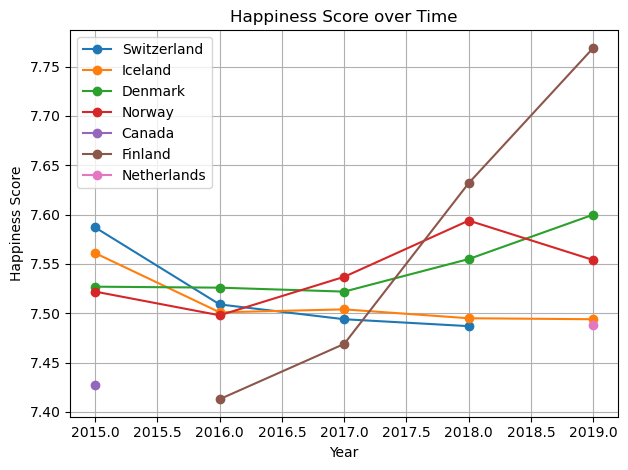

In [30]:
for country in top_5_df['country_name'].unique():
    country_data = top_5_df[top_5_df['country_name'] == country]
    plt.plot(country_data['year'], country_data['happiness_score'], marker='o', label=country)

plt.title("Happiness Score over Time")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

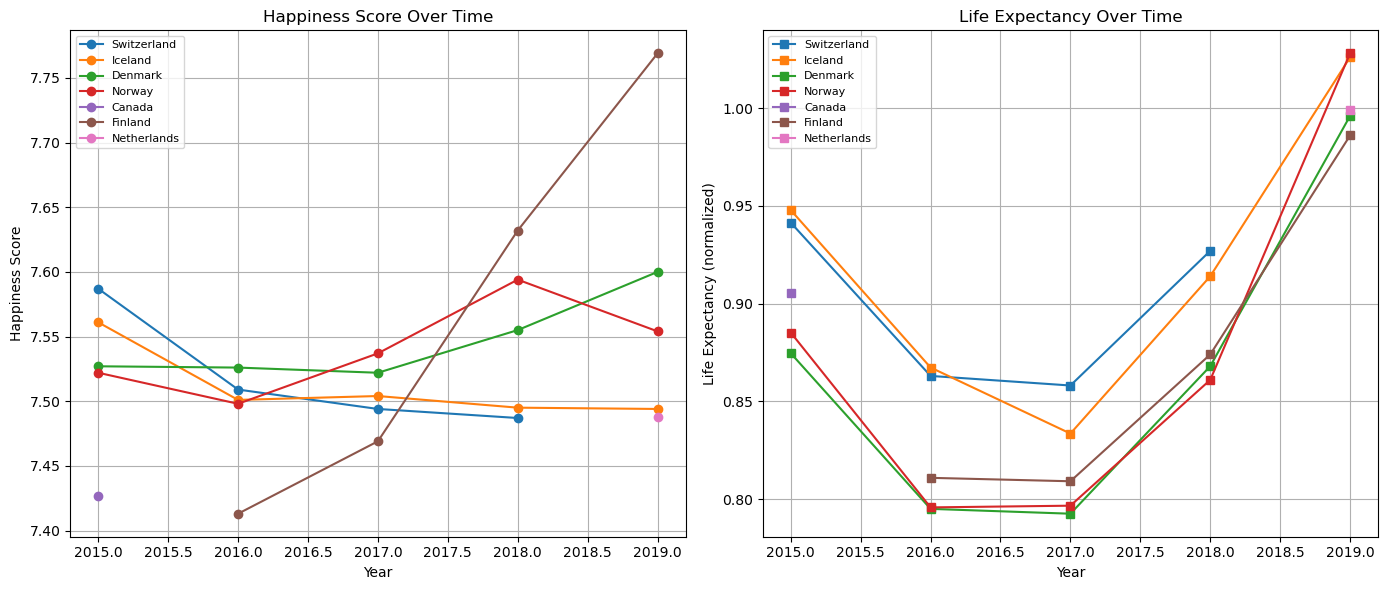

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True)

# Chart 1: Happiness Score
for country in top_5_df['country_name'].unique():
    subset = top_5_df[top_5_df['country_name'] == country]
    axes[0].plot(subset['year'], subset['happiness_score'], marker='o', label=country)

axes[0].set_title("Happiness Score Over Time")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Happiness Score")
axes[0].grid(True)
axes[0].legend(fontsize=8)

# Chart 2: Life Expectancy
for country in top_5_df['country_name'].unique():
    subset = top_5_df[top_5_df['country_name'] == country]
    axes[1].plot(subset['year'], subset['life_expectancy'], marker='s', label=country)

axes[1].set_title("Life Expectancy Over Time")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Life Expectancy (normalized)")
axes[1].grid(True)
axes[1].legend(fontsize=8)

plt.tight_layout()
plt.show()

In [8]:
import matplotlib.pyplot as plt

In [5]:
freedom = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\Mini_project_3\Analysis_SA\Queries\avg_happiness_score_vs_freedom.csv")

freedom

,freedom_range,avg_happiness_score,num_registros
0,0.0,3.697,14
1,0.1,4.246,38
2,0.2,4.794,76
3,0.3,4.898,116
4,0.4,5.174,187
5,0.5,5.618,191
6,0.6,6.331,140
7,0.7,6.693,19


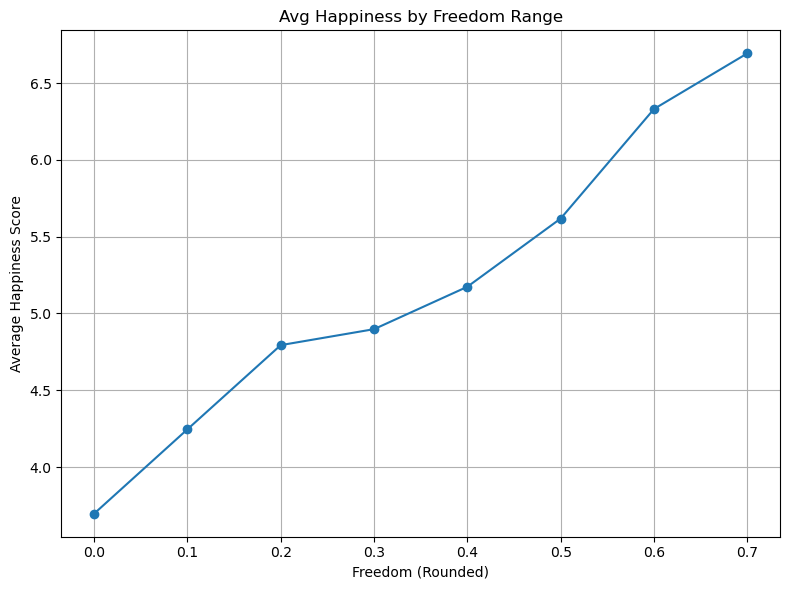

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(freedom['freedom_range'], freedom['avg_happiness_score'], marker='o')
plt.title('Avg Happiness by Freedom Range')
plt.xlabel('Freedom (Rounded)')
plt.ylabel('Average Happiness Score')
plt.grid(True)
plt.tight_layout()
plt.show()

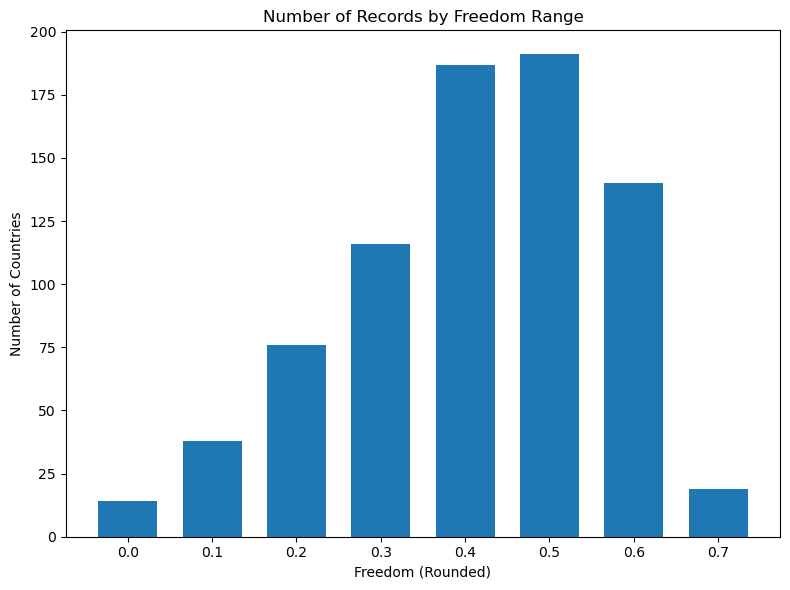

In [19]:
plt.figure(figsize=(8, 6))
plt.bar(freedom['freedom_range'], freedom['num_registros'], width=0.07)
plt.title('Number of Records by Freedom Range')
plt.xlabel('Freedom (Rounded)')
plt.ylabel('Number of Countries')
# plt.grid(axis='y')
plt.tight_layout()
plt.show()


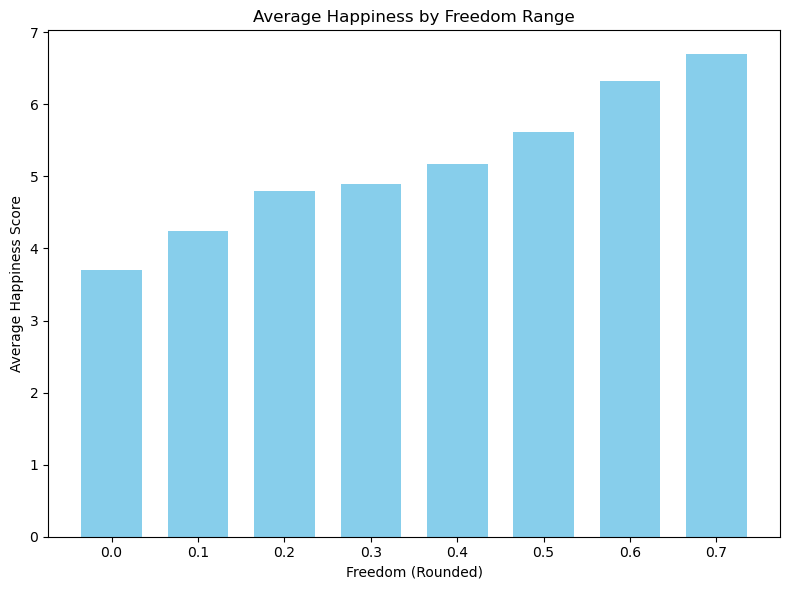

In [23]:
plt.figure(figsize=(8, 6))
plt.bar(freedom['freedom_range'], freedom['avg_happiness_score'], width=0.07, color='skyblue')
plt.title('Average Happiness by Freedom Range')
plt.xlabel('Freedom (Rounded)')
plt.ylabel('Average Happiness Score')
plt.tight_layout()
plt.show()

In [6]:
top_freedom = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\Mini_project_3\Analysis_SA\Queries\top_countries_high_freedom.csv")

top_freedom

,country_name,avg_freedom,avg_happiness_score
0,Denmark,0.626,7.546
1,Norway,0.638,7.541
2,Finland,0.622,7.538
3,Switzerland,0.621,7.511
4,Iceland,0.618,7.511
5,Canada,0.611,7.351
6,Sweden,0.618,7.319
7,New Zealand,0.618,7.313
8,Australia,0.605,7.276
9,Oman,0.633,6.853


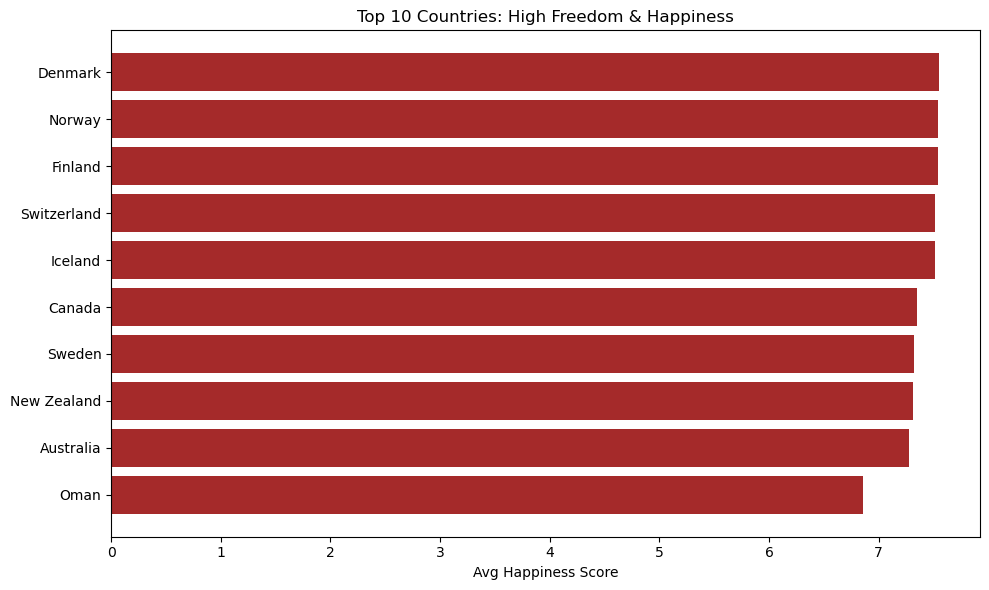

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(top_freedom['country_name'], top_freedom['avg_happiness_score'], color='brown')
plt.xlabel('Avg Happiness Score')
plt.title('Top 10 Countries: High Freedom & Happiness')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [7]:
low_freedom = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\Mini_project_3\Analysis_SA\Queries\countries_low_freedom.csv")

low_freedom

,country_name,avg_freedom,avg_happiness_score
0,Burundi,0.101,3.079
1,Central African Republic,0.322,3.134
2,Syria,0.082,3.292
3,South Sudan,0.116,3.382
4,Tanzania,0.387,3.466
5,Afghanistan,0.118,3.513
6,Togo,0.364,3.544
7,Yemen,0.244,3.626
8,Madagascar,0.177,3.745
9,Liberia,0.333,3.839


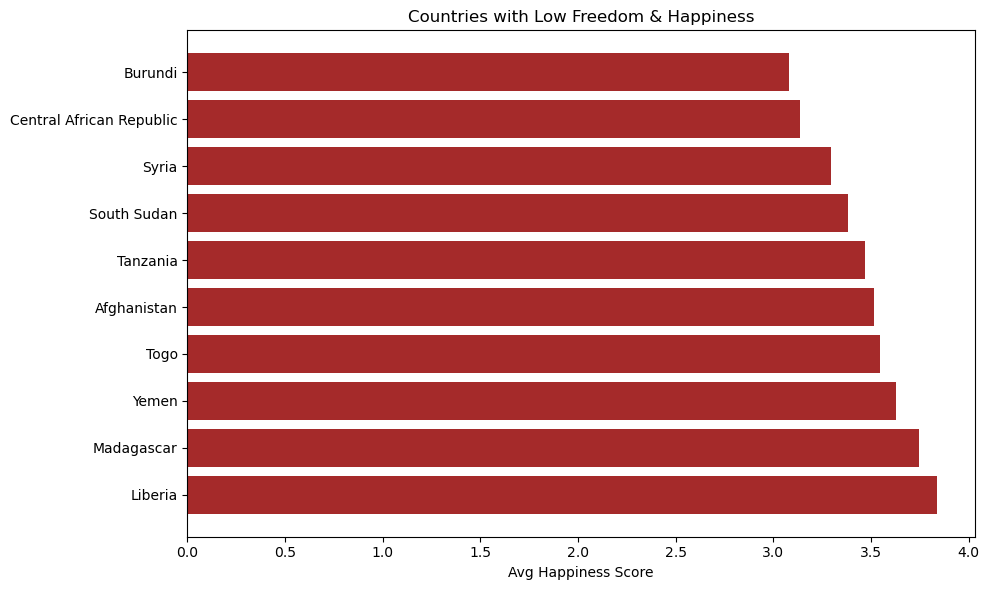

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(low_freedom['country_name'], low_freedom['avg_happiness_score'], color='brown')
plt.xlabel('Avg Happiness Score')
plt.title('Countries with Low Freedom & Happiness')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [31]:
corrp_freedom = pd.read_csv(r"C:\Users\sofia\Documents\Data_Analytics_Ironhack\Projects\Mini_project_3\Analysis_SA\Queries\corrp_freedom.csv")

corrp_freedom

,country_name,avg_corruption,avg_freedom
0,Rwanda,0.473,0.582
1,Singapore,0.467,0.553
2,Denmark,0.429,0.626
3,New Zealand,0.400,0.618
4,Finland,0.398,0.622
5,Sweden,0.398,0.618
6,Somaliland region,0.384,0.429
7,Switzerland,0.380,0.621
8,Qatar,0.356,0.604
9,Norway,0.344,0.638


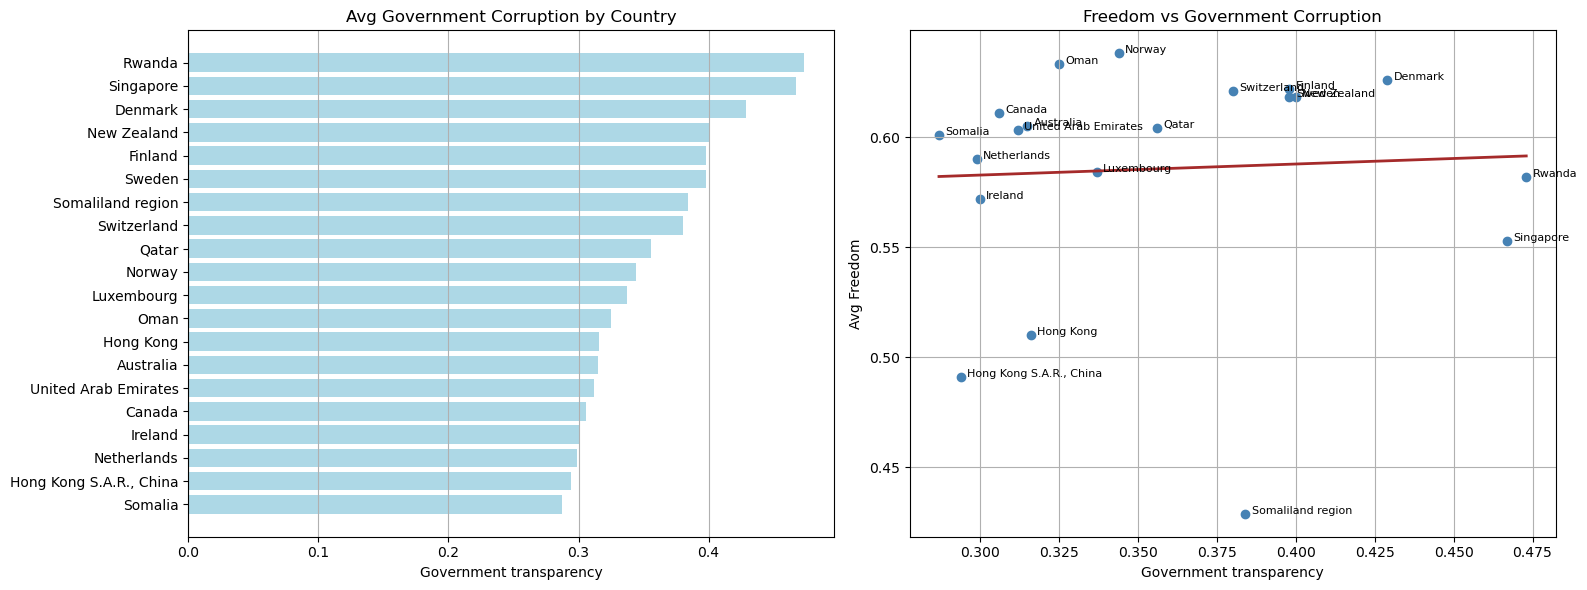

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df_sorted = corrp_freedom.sort_values(by='avg_corruption', ascending=False)
axes[0].barh(df_sorted['country_name'], df_sorted['avg_corruption'], color='lightblue')
axes[0].set_title('Avg Government Corruption by Country')
axes[0].set_xlabel('Government transparency')
axes[0].invert_yaxis()
axes[0].grid(axis='x')


x = corrp_freedom['avg_corruption']
y = corrp_freedom['avg_freedom']
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, color='brown', linewidth=2, label='Trend line')

axes[1].scatter(corrp_freedom['avg_corruption'], corrp_freedom['avg_freedom'], color='steelblue')
for i, row in corrp_freedom.iterrows():
    axes[1].text(row['avg_corruption'] + 0.002, row['avg_freedom'], row['country_name'], fontsize=8)
axes[1].set_title('Freedom vs Government Corruption')
axes[1].set_xlabel('Government transparency')
axes[1].set_ylabel('Avg Freedom')
axes[1].grid(True)

plt.tight_layout()
plt.show()